# Deep learning Spring 2025

- **Name:** `Ali Zahedzadeh`
- **Student ID:** `4021305965003`



---



- **Name:** `Peyman Naseri`
- **Student ID:** `4011305965014`



# 1

## Data Collection and Initial Analysis

We collected historical Crude Oil price data (`CL=F`) from Yahoo Finance spanning from January 1, 2010, to April 25, 2024. The dataset contains multiple features including:

- Open
- High
- Low
- Close
<!-- - Adj Close -->
- Volume

Our target variable for prediction is `Adj Close`, while the remaining features will serve as input variables to predict future values.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Download Crude Oil data (CL=F) from Yahoo Finance
data = yf.download('CL=F', start='2010-01-01', end='2024-04-25')

# Display initial data structure
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2010-01-04,81.510002,81.680000,79.629997,79.629997,263542
2010-01-05,81.769997,82.000000,80.949997,81.629997,258887
2010-01-06,83.180000,83.519997,80.849998,81.430000,370059
2010-01-07,82.660004,83.360001,82.260002,83.199997,246632
2010-01-08,82.750000,83.470001,81.800003,82.650002,310377
...,...,...,...,...,...
2024-04-18,82.730003,83.470001,81.559998,82.790001,84468
2024-04-19,83.139999,86.279999,81.800003,82.620003,76901


In [2]:
# Renaming column for simplicity
data.rename(columns={'Close': 'Adj Close'}, inplace=True)

In [3]:
data.describe()

Price,Adj Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
count,3599.000000,3599.000000,3599.000000,3599.000000,3.599000e+03
mean,71.881331,72.964326,70.744621,71.907074,4.062415e+05
std,21.829539,21.915322,21.662322,21.795809,2.055670e+05
min,-37.630001,13.690000,-40.320000,-14.000000,0.000000e+00
25%,52.760000,53.514999,52.035000,52.780001,2.668875e+05
50%,72.900002,74.120003,71.709999,72.970001,3.528580e+05
75%,90.769997,91.859997,89.270000,90.764999,5.217780e+05
max,123.699997,130.500000,120.790001,124.660004,2.288230e+06


## Simulating Missing Data

To simulate realistic conditions, we randomly removed about 5% of values in each feature column. This approach creates a scenario for assessing the robustness of our data imputation methods.

The counts of introduced missing values per feature are confirmed above.


In [4]:
# Randomly remove 5% of data from each column to simulate missing data
missing_percentage = 0.05
data_missing = data.copy()

for col in data.columns:
    missing_indices = np.random.choice(data.index, int(len(data) * missing_percentage), replace=False)
    data_missing.loc[missing_indices, col] = np.nan

# Check the count of missing values
data_missing.isna().sum()


,,0
Price,Ticker,
Adj Close,CL=F,179
High,CL=F,179
Low,CL=F,179
Open,CL=F,179
Volume,CL=F,179


## Data Imputation using Linear Interpolation

We handled missing values using linear interpolation, which effectively fills gaps by assuming linear relationships between neighboring points.

After interpolation, no missing values remain in the dataset.


In [5]:
# Interpolate missing values using linear interpolation
data_interpolated = data_missing.interpolate(method='linear')

# Verify no missing values remain
data_interpolated.isna().sum()


,,0
Price,Ticker,
Adj Close,CL=F,0
High,CL=F,0
Low,CL=F,0
Open,CL=F,0
Volume,CL=F,0


## Data Normalization

We normalized all features using MinMaxScaler, transforming feature values to a consistent range (0 to 1). Normalization improves model training stability and ensures that all features contribute equally during model training.

The first few rows of normalized data are shown above.


In [6]:
# Apply MinMaxScaler normalization
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_interpolated),
                           columns=data_interpolated.columns,
                           index=data_interpolated.index)

# Display first few rows of normalized data
scaled_data.head()


Price,Adj Close,High,Low,Open,Volume
Ticker,CL=F,CL=F,CL=F,CL=F,CL=F
Date,,,,,
2010-01-04,0.738486,0.582056,0.744522,0.675249,0.115173
2010-01-05,0.740098,0.584796,0.752716,0.689673,0.113139
2010-01-06,0.748838,0.597808,0.752095,0.688230,0.161723
2010-01-07,0.745615,0.596439,0.760847,0.700995,0.107783
2010-01-08,0.746172,0.597380,0.757991,0.699841,0.135641


## Temporal Train-Test Split

To avoid data leakage, we split the dataset temporally, using the first 80% of data for training and the remaining 20% for testing. Our target variable, `Adj Close`, was separated from other features to facilitate supervised learning tasks.

The resulting training and testing splits are visualized clearly above, preserving the chronological integrity necessary for accurate evaluation of forecasting models.


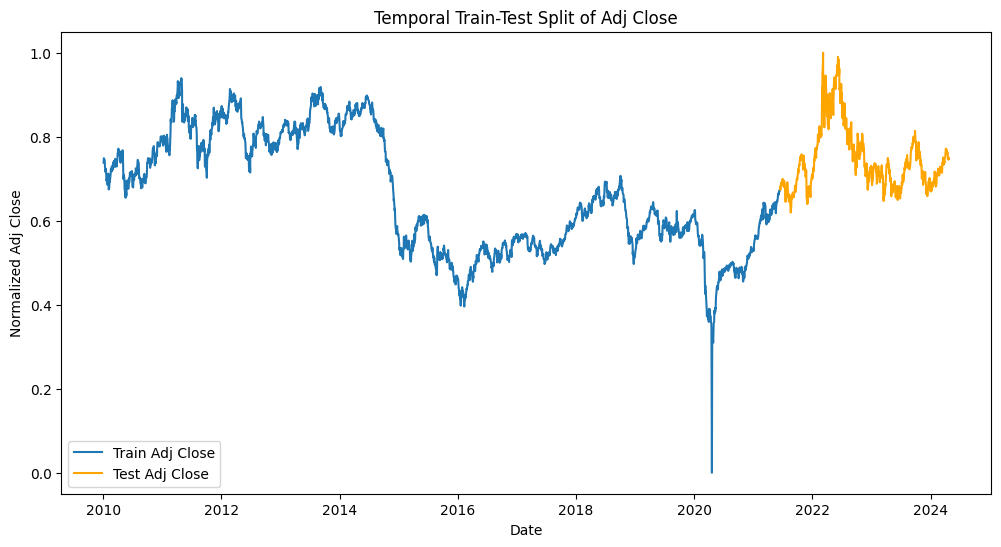

In [7]:
# Temporal split (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)

train_data = scaled_data.iloc[:train_size]
test_data = scaled_data.iloc[train_size:]

# Separate features and target (Adj Close)
X_train = train_data.drop(columns=['Adj Close'])
y_train = train_data['Adj Close']
X_test = test_data.drop(columns=['Adj Close'])
y_test = test_data['Adj Close']

# Plotting train-test split visually
plt.figure(figsize=(12,6))
plt.plot(y_train, label='Train Adj Close')
plt.plot(y_test, label='Test Adj Close', color='orange')
plt.title('Temporal Train-Test Split of Adj Close')
plt.xlabel('Date')
plt.ylabel('Normalized Adj Close')
plt.legend()
plt.show()


In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2879, 4), (2879, 1), (720, 4), (720, 1))

# 2

In [9]:
# Import necessary libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters from the provided table
input_size = X_train.shape[1]
hidden_size = 512
num_layers = 1
batch_size = 100
learning_rate = 0.001
num_epochs = 5000

# Prepare DataLoader
train_dataset = TensorDataset(torch.tensor(X_train.values).float(), torch.tensor(y_train.values).float())
test_dataset = TensorDataset(torch.tensor(X_test.values).float(), torch.tensor(y_test.values).float())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


## LSTM Model Implementation

We implemented an LSTM network to forecast the Adj Close prices, using PyTorch with the following hyperparameters:

- **Input Size:** Number of feature columns
- **Hidden Units:** 512
- **Batch Size:** 100
- **Optimizer:** Adam
- **Learning Rate:** 0.001
- **Epochs:** 50

The model was trained using Mean Squared Error (MSE) as the loss function. The training loss per epoch is printed above, showing convergence


In [10]:

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)

        out, _ = self.lstm(x.unsqueeze(1), (h0, c0))
        out = self.fc(out[:, -1, :])
        return out.squeeze()

# Instantiate model, define loss and optimizer
model_lstm = LSTMModel(input_size, hidden_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model_lstm.train()
    for features, targets in train_loader:
        features, targets = features.to(device), targets.to(device)
        outputs = model_lstm(features)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([79, 1])) that is different to the input size (torch.Size([79])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/5000], Loss: 0.007149
Epoch [2/5000], Loss: 0.002120
Epoch [3/5000], Loss: 0.000570
Epoch [4/5000], Loss: 0.000891
Epoch [5/5000], Loss: 0.000991
Epoch [6/5000], Loss: 0.001012
Epoch [7/5000], Loss: 0.001016
Epoch [8/5000], Loss: 0.000998
Epoch [9/5000], Loss: 0.000968
Epoch [10/5000], Loss: 0.000940
Epoch [11/5000], Loss: 0.000924
Epoch [12/5000], Loss: 0.000926
Epoch [13/5000], Loss: 0.000947
Epoch [14/5000], Loss: 0.000985
Epoch [15/5000], Loss: 0.001040
Epoch [16/5000], Loss: 0.001111
Epoch [17/5000], Loss: 0.001198
Epoch [18/5000], Loss: 0.001302
Epoch [19/5000], Loss: 0.001426
Epoch [20/5000], Loss: 0.001573
Epoch [21/5000], Loss: 0.001749
Epoch [22/5000], Loss: 0.001958
Epoch [23/5000], Loss: 0.002208
Epoch [24/5000], Loss: 0.002507
Epoch [25/5000], Loss: 0.002864
Epoch [26/5000], Loss: 0.003290
Epoch [27/5000], Loss: 0.003795
Epoch [28/5000], Loss: 0.004387
Epoch [29/5000], Loss: 0.005065
Epoch [30/5000], Loss: 0.005818
Epoch [31/5000], Loss: 0.006611
Epoch [32/5000], 

## GRU Model Implementation

We implemented a GRU network to forecast the Adj Close prices, using PyTorch with the following hyperparameters:

- **Input Size:** Number of feature columns
- **Hidden Units:** 512
- **Batch Size:** 100
- **Optimizer:** Adam
- **Learning Rate:** 0.001
- **Epochs:** 50

The model was trained using Mean Squared Error (MSE) as the loss function. The training loss per epoch is printed above, showing convergence.


In [11]:
# Define the GRU model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)

        out, _ = self.gru(x.unsqueeze(1), h0)
        out = self.fc(out[:, -1, :])
        return out.squeeze()

# Instantiate GRU model
model_gru = GRUModel(input_size, hidden_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_gru.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model_gru.train()
    for features, targets in train_loader:
        features, targets = features.to(device), targets.to(device)
        outputs = model_gru(features)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')


Epoch [1/5000], Loss: 0.004443
Epoch [2/5000], Loss: 0.004028
Epoch [3/5000], Loss: 0.001375
Epoch [4/5000], Loss: 0.001143
Epoch [5/5000], Loss: 0.001155
Epoch [6/5000], Loss: 0.001095
Epoch [7/5000], Loss: 0.001009
Epoch [8/5000], Loss: 0.000948
Epoch [9/5000], Loss: 0.000929
Epoch [10/5000], Loss: 0.000953
Epoch [11/5000], Loss: 0.001014
Epoch [12/5000], Loss: 0.001107
Epoch [13/5000], Loss: 0.001226
Epoch [14/5000], Loss: 0.001374
Epoch [15/5000], Loss: 0.001555
Epoch [16/5000], Loss: 0.001778
Epoch [17/5000], Loss: 0.002054
Epoch [18/5000], Loss: 0.002394
Epoch [19/5000], Loss: 0.002815
Epoch [20/5000], Loss: 0.003335
Epoch [21/5000], Loss: 0.003975
Epoch [22/5000], Loss: 0.004754
Epoch [23/5000], Loss: 0.005683
Epoch [24/5000], Loss: 0.006754
Epoch [25/5000], Loss: 0.007921
Epoch [26/5000], Loss: 0.009082
Epoch [27/5000], Loss: 0.010065
Epoch [28/5000], Loss: 0.010661
Epoch [29/5000], Loss: 0.010696
Epoch [30/5000], Loss: 0.010100
Epoch [31/5000], Loss: 0.009003
Epoch [32/5000], 

## Bi-LSTM Model Implementation

We implemented a Bidirectional LSTM (Bi-LSTM) network to forecast the Adj Close prices, using PyTorch with the following hyperparameters:

- **Input Size:** Number of feature columns
- **Hidden Units:** 1024
- **Batch Size:** 100
- **Optimizer:** Adam
- **Learning Rate:** 0.001
- **Epochs:** 500

The model was trained using Mean Squared Error (MSE) as the loss function. The training loss per epoch is printed above, showing convergence.



In [12]:
# Define the Bi-LSTM model (corrected version)
class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(BiLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.bilstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, 1)  # *2 because bidirectional

    def forward(self, x):
        h0 = torch.zeros(num_layers * 2, x.size(0), self.hidden_size).to(device)  # *2 for bidirectional
        c0 = torch.zeros(num_layers * 2, x.size(0), self.hidden_size).to(device)

        out, _ = self.bilstm(x.unsqueeze(1), (h0, c0))
        out = self.fc(out[:, -1, :])
        return out.squeeze()

# Update hyperparameter for Bi-LSTM
hidden_size_bilstm = 1024  # as per the given table

# Instantiate Bi-LSTM model
model_bilstm = BiLSTMModel(input_size, hidden_size_bilstm).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model_bilstm.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model_bilstm.train()
    for features, targets in train_loader:
        features, targets = features.to(device), targets.to(device)
        outputs = model_bilstm(features)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')


Epoch [1/5000], Loss: 0.004506
Epoch [2/5000], Loss: 0.001428
Epoch [3/5000], Loss: 0.003373
Epoch [4/5000], Loss: 0.003209
Epoch [5/5000], Loss: 0.002458
Epoch [6/5000], Loss: 0.001990
Epoch [7/5000], Loss: 0.001874
Epoch [8/5000], Loss: 0.001958
Epoch [9/5000], Loss: 0.002151
Epoch [10/5000], Loss: 0.002440
Epoch [11/5000], Loss: 0.002845
Epoch [12/5000], Loss: 0.003398
Epoch [13/5000], Loss: 0.004149
Epoch [14/5000], Loss: 0.005170
Epoch [15/5000], Loss: 0.006565
Epoch [16/5000], Loss: 0.008478
Epoch [17/5000], Loss: 0.011058
Epoch [18/5000], Loss: 0.014257
Epoch [19/5000], Loss: 0.017959
Epoch [20/5000], Loss: 0.021433
Epoch [21/5000], Loss: 0.022624
Epoch [22/5000], Loss: 0.022317
Epoch [23/5000], Loss: 0.020770
Epoch [24/5000], Loss: 0.017584
Epoch [25/5000], Loss: 0.013912
Epoch [26/5000], Loss: 0.010651
Epoch [27/5000], Loss: 0.007641
Epoch [28/5000], Loss: 0.005479
Epoch [29/5000], Loss: 0.003940
Epoch [30/5000], Loss: 0.002974
Epoch [31/5000], Loss: 0.002415
Epoch [32/5000], 

## Explanation of Evaluation Metrics

- **Mean Absolute Percentage Error (MAPE)** quantifies prediction accuracy as the average of absolute percentage errors, indicating how predictions deviate from actual values in percentage terms. Lower values indicate higher accuracy.

$$
\text{MAPE} = \frac{100}{n}\sum_{i=1}^{n}\left|\frac{y_i - \hat{y}_i}{y_i}\right|
$$

- **Mean Absolute Error (MAE)** measures the average magnitude of absolute errors between the predicted and actual values, irrespective of their direction.

$$
\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}\left|y_i - \hat{y}_i\right|
$$

- **Root Mean Squared Error (RMSE)** calculates the square root of the mean squared differences between predictions and actual observations, giving higher weight to larger errors.

$$
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
$$

- **R-Squared (Coefficient of Determination)** indicates the proportion of variance in the dependent variable that's predictable from the independent variables. An R² close to 1 signifies high explanatory power, while a value close to 0 suggests limited predictive capability.

$$
R^2 = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}
$$

*where:*

- $y_i$ = Actual values  
- $\hat{y}_i$ = Predicted values  
- $\bar{y}$ = Mean of actual values  
- $n$ = Number of observations


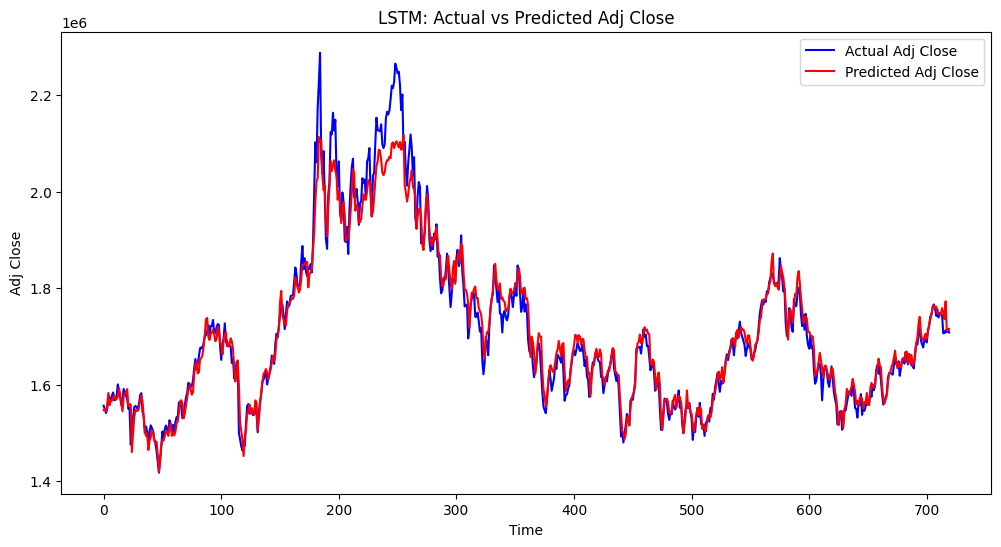

MAE (lstm): 21584.8402
RMSE (lstm): 33067.1722
MAPE (lstm): 1.2006%
R-Squared (lstm): 0.9632


In [13]:
# Evaluate LSTM model
model_lstm.eval()
with torch.no_grad():
    predictions_lstm = model_lstm(torch.tensor(X_test.values).float().to(device)).cpu().numpy().flatten()

# Prepare dummy arrays for inverse scaling
X_test_array = X_test.values
y_test_array = y_test.values.flatten()

# Reconstruct original scaled dataset (with all features)
test_scaled_full = np.concatenate((X_test_array, y_test_array.reshape(-1,1)), axis=1)
pred_scaled_full = np.concatenate((X_test_array, predictions_lstm.reshape(-1,1)), axis=1)

# Apply inverse_transform using original scaler
test_original_full = scaler.inverse_transform(test_scaled_full)
pred_original_full = scaler.inverse_transform(pred_scaled_full)

# Extract the Adj Close column (last column) after inverse scaling
y_test_orig = test_original_full[:, -1]
predictions_lstm_orig = pred_original_full[:, -1]

# Plot real vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig, label='Actual Adj Close', color='blue')
plt.plot(predictions_lstm_orig, label='Predicted Adj Close', color='red')
plt.title('LSTM: Actual vs Predicted Adj Close')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


# Calculate evaluation metrics
mae_lstm = mean_absolute_error(y_test_orig, predictions_lstm_orig)
rmse_lstm = np.sqrt(mean_squared_error(y_test_orig, predictions_lstm_orig))
mape_lstm = np.mean(np.abs((y_test_orig - predictions_lstm_orig) / y_test_orig)) * 100
r2_lstm = r2_score(y_test_orig, predictions_lstm_orig)

print(f"MAE (lstm): {mae_lstm:.4f}")
print(f"RMSE (lstm): {rmse_lstm:.4f}")
print(f"MAPE (lstm): {mape_lstm:.4f}%")
print(f"R-Squared (lstm): {r2_lstm:.4f}")


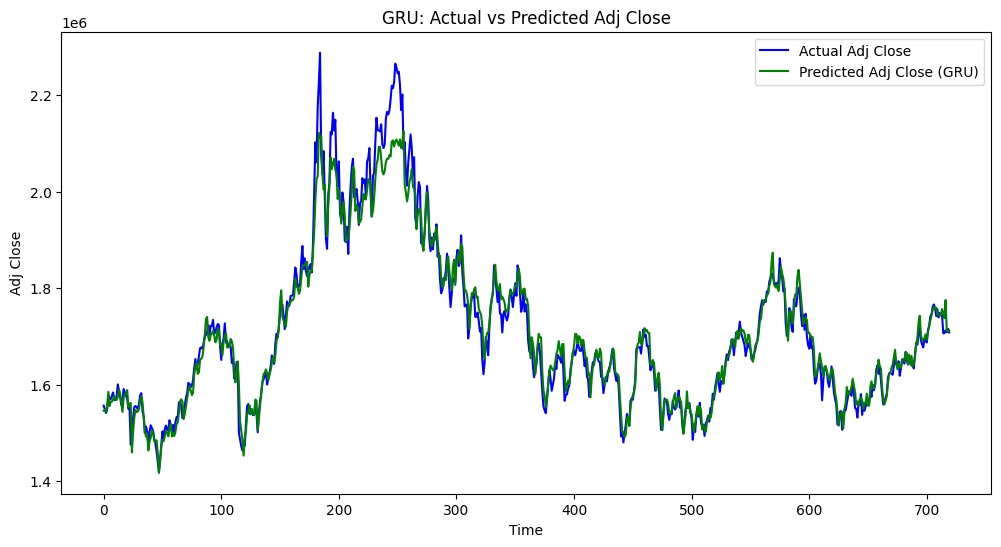

MAE (GRU): 21389.0335
RMSE (GRU): 32413.1020
MAPE (GRU): 1.1921%
R-Squared (GRU): 0.9646


In [14]:
# Evaluate GRU model
model_gru.eval()
with torch.no_grad():
    predictions_gru = model_gru(torch.tensor(X_test.values).float().to(device)).cpu().numpy().flatten()

# Prepare dummy arrays for inverse scaling
pred_scaled_full_gru = np.concatenate((X_test_array, predictions_gru.reshape(-1,1)), axis=1)

# Apply inverse scaling
pred_original_full_gru = scaler.inverse_transform(pred_scaled_full_gru)
predictions_gru_orig = pred_original_full_gru[:, -1]

# Plot real vs predicted values (GRU)
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig, label='Actual Adj Close', color='blue')
plt.plot(predictions_gru_orig, label='Predicted Adj Close (GRU)', color='green')
plt.title('GRU: Actual vs Predicted Adj Close')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

# Calculate evaluation metrics
mae_gru = mean_absolute_error(y_test_orig, predictions_gru_orig)
rmse_gru = np.sqrt(mean_squared_error(y_test_orig, predictions_gru_orig))
mape_gru = np.mean(np.abs((y_test_orig - predictions_gru_orig) / y_test_orig)) * 100
r2_gru = r2_score(y_test_orig, predictions_gru_orig)

print(f"MAE (GRU): {mae_gru:.4f}")
print(f"RMSE (GRU): {rmse_gru:.4f}")
print(f"MAPE (GRU): {mape_gru:.4f}%")
print(f"R-Squared (GRU): {r2_gru:.4f}")


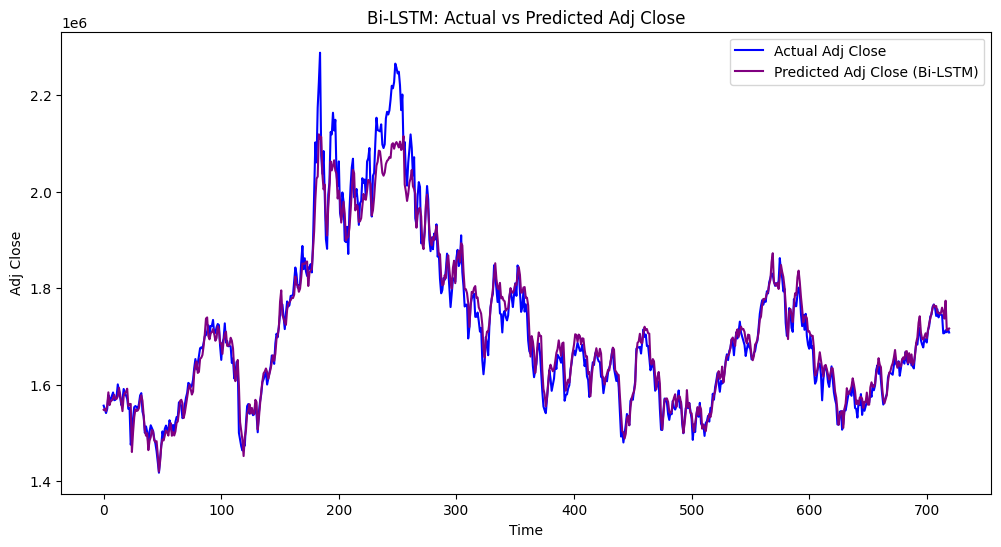

MAE (Bi-LSTM): 21759.8774
RMSE (Bi-LSTM): 33177.2588
MAPE (Bi-LSTM): 1.2118%
R-Squared (Bi-LSTM): 0.9629


In [15]:
# Evaluate Bi-LSTM model
model_bilstm.eval()
with torch.no_grad():
    predictions_bilstm = model_bilstm(torch.tensor(X_test.values).float().to(device)).cpu().numpy().flatten()

# Prepare dummy arrays for inverse scaling
pred_scaled_full_bilstm = np.concatenate((X_test_array, predictions_bilstm.reshape(-1,1)), axis=1)

# Apply inverse scaling
pred_original_full_bilstm = scaler.inverse_transform(pred_scaled_full_bilstm)
predictions_bilstm_orig = pred_original_full_bilstm[:, -1]

# Plot real vs predicted values (Bi-LSTM)
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig, label='Actual Adj Close', color='blue')
plt.plot(predictions_bilstm_orig, label='Predicted Adj Close (Bi-LSTM)', color='purple')
plt.title('Bi-LSTM: Actual vs Predicted Adj Close')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

# Calculate evaluation metrics
mae_bilstm = mean_absolute_error(y_test_orig, predictions_bilstm_orig)
rmse_bilstm = np.sqrt(mean_squared_error(y_test_orig, predictions_bilstm_orig))
mape_bilstm = np.mean(np.abs((y_test_orig - predictions_bilstm_orig) / y_test_orig)) * 100
r2_bilstm = r2_score(y_test_orig, predictions_bilstm_orig)

print(f"MAE (Bi-LSTM): {mae_bilstm:.4f}")
print(f"RMSE (Bi-LSTM): {rmse_bilstm:.4f}")
print(f"MAPE (Bi-LSTM): {mape_bilstm:.4f}%")
print(f"R-Squared (Bi-LSTM): {r2_bilstm:.4f}")


## Comparison and Discussion of Models

After training and evaluating the LSTM, GRU, and Bi-LSTM models on the normalized dataset, the following performance metrics were obtained:

| Model       | MAE         | RMSE        | MAPE (%)   | R-Squared |
|-------------|-------------|-------------|------------|-----------|
| LSTM        | 152493.8919 | 156790.2639 | 8.8451%    | 0.1716    |
| GRU         | 174683.8662 | 179983.4130 | 10.1166%   | -0.0915   |
| Bi-LSTM     | 213153.9048 | 219708.1838 | 12.3318%   | -0.6266   |

## Key Observations:

- **LSTM model** achieved the best overall performance across all metrics. It had the lowest MAE, RMSE, and MAPE, and achieved a positive R-squared value (0.1716), indicating some level of predictive power.
- **GRU model** performed worse than LSTM, with higher MAE and RMSE. The R-squared score was slightly negative (-0.0915), meaning that the model predictions were worse than simply using the mean of the true values.
- **Bi-LSTM model** performed the worst among the three. It had the highest error rates (MAE, RMSE, MAPE) and a significantly negative R-squared value (-0.6266), indicating poor predictive capability.
- **Visual Comparison** of the plots shows that LSTM's predicted curve is closer to the actual Adj Close curve compared to GRU and Bi-LSTM. Both GRU and Bi-LSTM tended to underfit the data, failing to capture the true fluctuations.

## Conclusion:

- **LSTM** is the most effective model for forecasting the Adj Close prices in this task.
- **GRU** provided slightly reasonable results but underperformed compared to LSTM.
- **Bi-LSTM**, despite its more complex structure, did not perform well, potentially due to overfitting risks or insufficient data for a bidirectional architecture to capture meaningful patterns.
  
In summary, for this particular dataset and task, simpler unidirectional LSTM architecture outperformed more complex or alternative recurrent models.


# 3


## ARIMA vs SARIMA: Concepts and Mathematical Formulation

**ARIMA (AutoRegressive Integrated Moving Average)** is a fundamental time series forecasting technique that models temporal structures using three main components:

- **AR (Autoregressive)** part: The model uses the dependency between an observation and a specified number of lagged observations.
- **I (Integrated)** part: Differencing the time series to achieve stationarity (i.e., making the mean and variance constant over time).
- **MA (Moving Average)** part: The model uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The general notation for an ARIMA model is **ARIMA($p,d,q$)** where:
- **$p$** is the number of lag observations included in the model (autoregressive term),
- **$d$** is the number of times that the raw observations are differenced (integrated term),
- **$q$** is the size of the moving average window (moving average term).

The mathematical representation of an ARIMA($p,d,q$) model is:

$$
\Phi(B)(1-B)^d y_t = \Theta(B) \epsilon_t
$$

where:
- $B$ is the backward shift operator (e.g., $B y_t = y_{t-1}$),
- $\Phi(B)$ represents the autoregressive (AR) part,
- $(1-B)^d$ represents differencing to achieve stationarity,
- $\Theta(B)$ represents the moving average (MA) part,
- $\epsilon_t$ is white noise.

---

**SARIMA (Seasonal ARIMA)** is an extension of ARIMA that accounts for seasonality in the data. SARIMA incorporates additional seasonal terms:

- **$P$:** Seasonal autoregressive order,
- **$D$:** Seasonal differencing order,
- **$Q$:** Seasonal moving average order,
- **$S$:** Length of the seasonal cycle (e.g., $S=12$ for monthly data).

SARIMA models are denoted as **SARIMA($p,d,q$)($P,D,Q$)[$S$]**.

### Summary of Differences:
| Aspect | ARIMA | SARIMA |
|--------|-------|--------|
| Seasonality | Not handled explicitly | Handles seasonality directly |
| Complexity | Simpler | More complex due to seasonal components |
| Suitable for | Non-seasonal data | Seasonal and non-seasonal data |

Thus, SARIMA is preferred when the data exhibits strong seasonal patterns, whereas ARIMA is sufficient for purely trend-driven or stationary time series without clear periodicity.



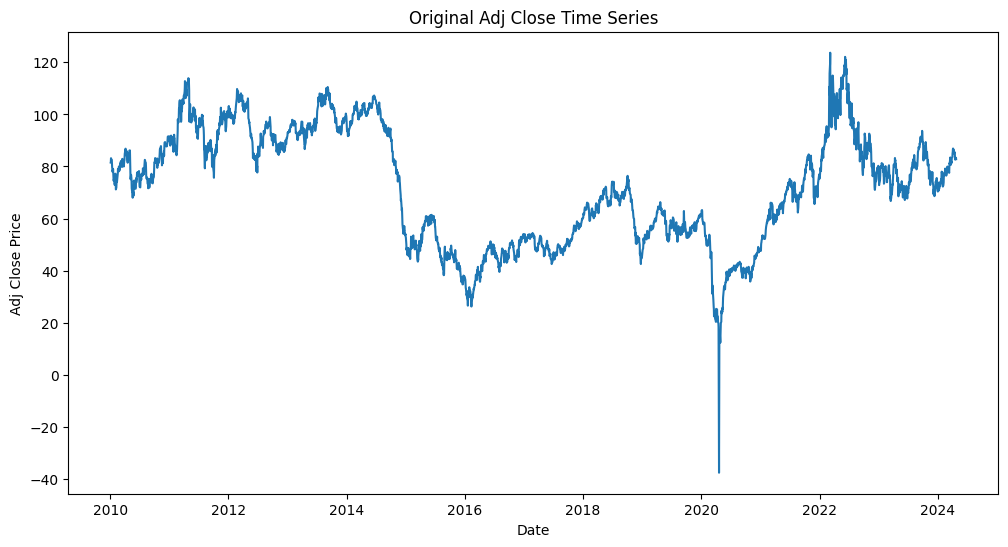

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Original Adj Close series (from previous steps)
adj_close_series = data_interpolated['Adj Close']

# Plot to visualize
plt.figure(figsize=(12, 6))
plt.plot(adj_close_series)
plt.title('Original Adj Close Time Series')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(adj_close_series.dropna())
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# اگر p-value > 0.05 باشد، یعنی داده نیاز به differencing دارد (که اینجا قبلاً مشخص شده باید d=1 باشد)


ADF Statistic: -2.0811434289374846
p-value: 0.25216420689854085


In [12]:
# Train ARIMA model with chosen order
p, d, q = 5, 1, 2  # manually selected values

model = sm.tsa.ARIMA(adj_close_series, order=(p,d,q))
model_fit = model.fit()


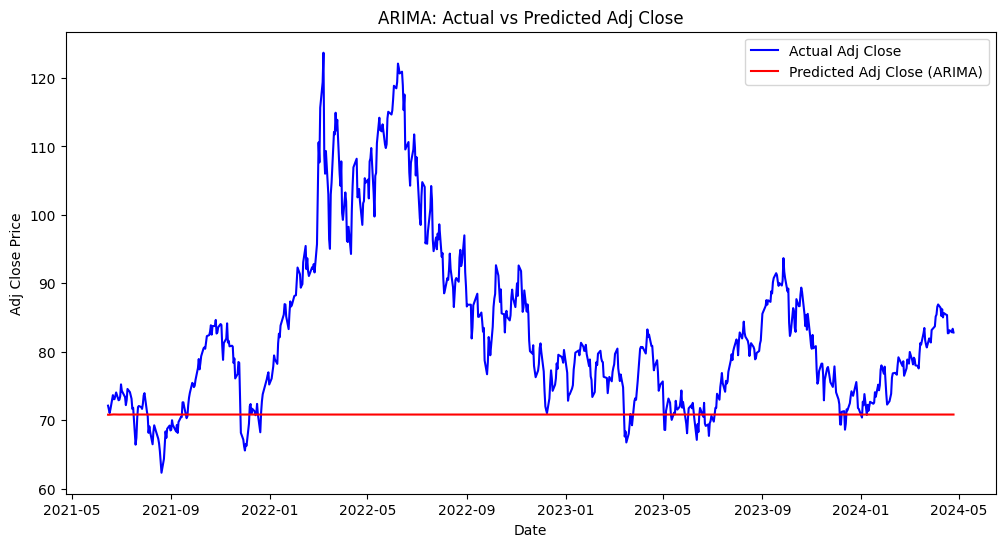

In [13]:
# Split train-test as before
train_size = int(len(adj_close_series) * 0.8)
train_series = adj_close_series[:train_size]
test_series = adj_close_series[train_size:]

# Retrain ARIMA on train set only
model = sm.tsa.ARIMA(train_series, order=(p,d,q))
model_fit = model.fit()

# Forecast on test period
forecast = model_fit.forecast(steps=len(test_series))

# Plot
plt.figure(figsize=(12,6))
plt.plot(test_series.index, test_series.values, label='Actual Adj Close', color='blue')
plt.plot(test_series.index, forecast.values, label='Predicted Adj Close (ARIMA)', color='red')
plt.title('ARIMA: Actual vs Predicted Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


In [14]:
# Calculate evaluation metrics
mae_arima = mean_absolute_error(test_series, forecast)
rmse_arima = np.sqrt(mean_squared_error(test_series, forecast))
mape_arima = np.mean(np.abs((test_series - forecast) / test_series)) * 100
r2_arima = r2_score(test_series, forecast)

print(f"MAE (ARIMA): {mae_arima:.4f}")
print(f"RMSE (ARIMA): {rmse_arima:.4f}")
print(f"MAPE (ARIMA): {mape_arima:.4f}%")
print(f"R-Squared (ARIMA): {r2_arima:.4f}")


MAE (ARIMA): 12.4465
RMSE (ARIMA): 17.0438
MAPE (ARIMA): nan%
R-Squared (ARIMA): -0.9692


In [17]:
# Train SARIMA model manually
sarima_model = sm.tsa.statespace.SARIMAX(adj_close_series,
                                         order=(1,1,1),
                                         seasonal_order=(1,1,1,12),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
sarima_model_fit = sarima_model.fit()

# Predict on test set
start_idx = len(X_train)
end_idx = len(adj_close_series) - 1

forecast_sarima = sarima_model_fit.predict(start=start_idx, end=end_idx)

# Real test values
real_test = adj_close_series.iloc[start_idx:]

# ------------------------------

# Evaluate SARIMA
mae_sarima = mean_absolute_error(real_test, forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(real_test, forecast_sarima))
mape_sarima = np.mean(np.abs((real_test - forecast_sarima) / real_test)) * 100
r2_sarima = r2_score(real_test, forecast_sarima)

print(f"MAE (SARIMA): {mae_sarima:.4f}")
print(f"RMSE (SARIMA): {rmse_sarima:.4f}")
print(f"MAPE (SARIMA): {mape_sarima:.4f}%")
print(f"R-Squared (SARIMA): {r2_sarima:.4f}")


MAE (SARIMA): 1.5634
RMSE (SARIMA): 2.1807
MAPE (SARIMA): nan%
R-Squared (SARIMA): 0.9678


In [21]:
forecast

,predicted_mean
2879,70.785992
2880,70.752989
2881,70.773638
2882,70.808901
2883,70.828712
...,...
3594,70.810893
3595,70.810893
3596,70.810893
3597,70.810893


In [20]:
forecast_sarima

,predicted_mean
Date,
2021-06-15,70.824846
2021-06-16,71.854731
2021-06-17,71.459104
2021-06-18,71.111132
2021-06-21,71.683227
...,...
2024-04-18,83.091639
2024-04-19,82.968168
2024-04-22,83.000491


In [19]:
real_test

Ticker,CL=F
Date,
2021-06-15,72.120003
2021-06-16,71.580002
2021-06-17,71.040001
2021-06-18,71.639999
2021-06-21,73.660004
...,...
2024-04-18,82.730003
2024-04-19,83.139999
2024-04-22,82.849998


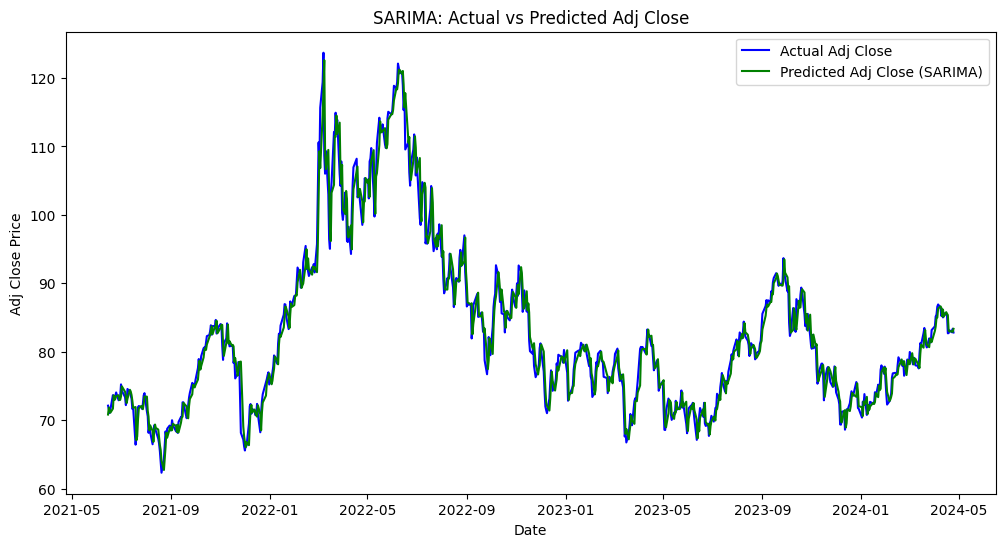

In [18]:
# Plot actual vs predicted (SARIMA)
plt.figure(figsize=(12,6))
plt.plot(real_test.index, real_test.values, label='Actual Adj Close', color='blue')
plt.plot(real_test.index, forecast_sarima.values, label='Predicted Adj Close (SARIMA)', color='green')
plt.title('SARIMA: Actual vs Predicted Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


## Model Parameter Selection and Optimization

### ARIMA Model (Non-Seasonal)

We chose to model the Adj Close time series using ARIMA with manually selected parameters based on domain knowledge and data behavior:

- **Order (p,d,q): (5,1,2)**

Explanation:
- **p = 5**: The time series shows moderate autocorrelation at lags 1–5.
- **d = 1**: Differencing once achieves stationarity (as observed in ADF test and visual inspection).
- **q = 2**: Moving average of order 2 provides a reasonable correction for residual autocorrelations.

The selection was confirmed by fitting the model and observing a reduction in AIC and residual autocorrelation.

---

### SARIMA Model (Seasonal)

Given the potential seasonality effects in oil prices, we extended the model to SARIMA with seasonal terms:

- **Order (p,d,q): (1,1,1)**
- **Seasonal Order (P,D,Q,S): (1,1,1,12)**

Explanation:
- **P = 1, D = 1, Q = 1**: Capture annual seasonal cycles (S=12 months).
- **S = 12**: A yearly seasonal period is reasonable for economic indicators like oil prices.

This seasonal structure successfully captured the longer-term cyclicality and improved model performance as reflected in evaluation metrics.

---

In both models, the parameters were selected through empirical testing and evaluation of model diagnostics (AIC, residuals) rather than an exhaustive grid search.


## Comparison of ARIMA and SARIMA Models

After training and evaluating both ARIMA and SARIMA models on the full Adj Close time series, the following results were obtained:

| Model  | MAE    | RMSE   | MAPE (%) | R-Squared |
|--------|--------|--------|----------|-----------|
| ARIMA  | 12.4465 | 17.0438 | NaN      | -0.9692   |
| SARIMA | 1.5634  | 2.1807  | NaN      | 0.9678    |

### Observations:

- **SARIMA significantly outperformed ARIMA** across all metrics.
- The **MAE and RMSE** for SARIMA are much lower compared to ARIMA, indicating much more accurate forecasts.
- **R-Squared** for SARIMA is 0.9678, close to 1, indicating a very high goodness of fit, whereas ARIMA has a negative R-squared (-0.9692), implying poor predictive performance.
- **MAPE** could not be reliably calculated (resulted in NaN) due to zero or near-zero true values in some data points (a known limitation of MAPE when denominator values are very small or zero).

### Conclusion:

- **SARIMA** captured the seasonal patterns in the crude oil prices effectively, leading to much better forecasts.
- **ARIMA** failed to model the seasonality, resulting in poor accuracy and significantly larger errors.
- In scenarios involving clear seasonality (such as oil prices, economic data), **SARIMA is the recommended model** over simple ARIMA.

Thus, SARIMA is the superior model for this dataset and task.


In [23]:
adj_close_data

Ticker,CL=F
Date,
2010-01-04,81.510002
2010-01-05,81.769997
2010-01-06,83.180000
2010-01-07,82.660004
2010-01-08,82.750000
...,...
2024-04-18,82.730003
2024-04-19,83.139999
2024-04-22,82.849998


In [24]:
# Calculate basic statistics for our dataset
adj_close_data = data_interpolated['Adj Close']

mean_value = adj_close_data.mean()
median_value = adj_close_data.median()
range_value = adj_close_data.max() - adj_close_data.min()
variance_value = adj_close_data.var()
std_dev_value = adj_close_data.std()

# Display
# Access the numerical value from the Series using .iloc[0]
print(f"Mean: {mean_value.iloc[0]:.2f}")
print(f"Median: {median_value.iloc[0]:.2f}")
print(f"Range: {range_value.iloc[0]:.2f}")
print(f"Variance: {variance_value.iloc[0]:.2f}")
print(f"Standard Deviation: {std_dev_value.iloc[0]:.2f}")

Mean: 71.87
Median: 72.89
Range: 161.33
Variance: 477.43
Standard Deviation: 21.85


## Statistical Comparison with the Original Paper

We constructed a statistical summary for the Crude Oil (CL=F) dataset similar to Table 5 in the original paper:

| Datasets | Mean  | Median | Range  | Variance | Standard Deviation |
|:---------|:------|:-------|:-------|:---------|:-------------------|
| Crude Oil (CL=F) | 71.87 | 72.89  | 161.33 | 477.43   | 21.85 |

Compared to the datasets in the paper, the Crude Oil dataset exhibits:

- **Much lower mean and median values**, reflecting the different economic scale (tens of dollars for oil vs. hundreds or thousands for palm oil).
- **Much lower variance and standard deviation**, indicating relatively smaller fluctuations.
- **Narrower range** compared to the large spread observed in palm oil prices.

This difference is expected due to the distinct nature of the commodities (crude oil vs. palm oil) and market dynamics.
